# Bank Customer Data Prediction Project..!!

## Import Libraries..!!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## Read data from csv file..!!

In [2]:
bank_frame = pd.read_csv('bank.csv')
bank_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank_frame.shape

(11162, 17)

In [4]:
bank_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
bank_frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
bank_frame.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
bank_frame.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
type(bank_frame)

pandas.core.frame.DataFrame

In [11]:
bank_frame.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

## Countplot using seaborn..!!

<AxesSubplot:xlabel='balance', ylabel='count'>

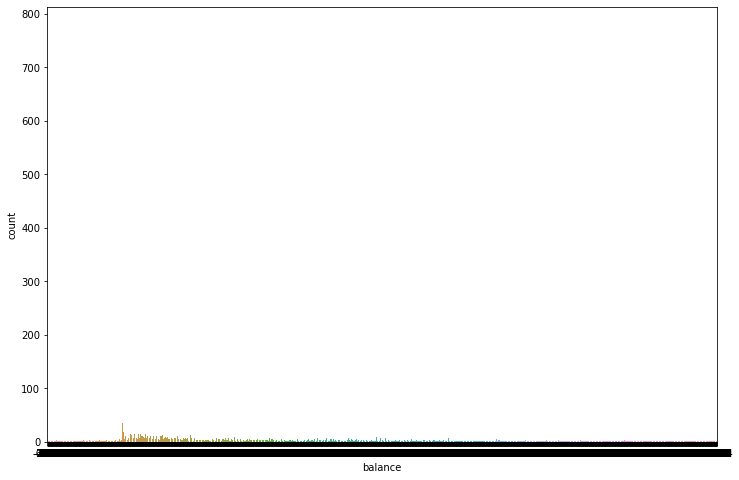

In [14]:
fig = plt.figure(figsize = (12, 8))
sns.countplot(x = 'balance', data = bank_frame)

## Let's observe the balance and duration of the customer..!!

<AxesSubplot:xlabel='balance', ylabel='duration'>

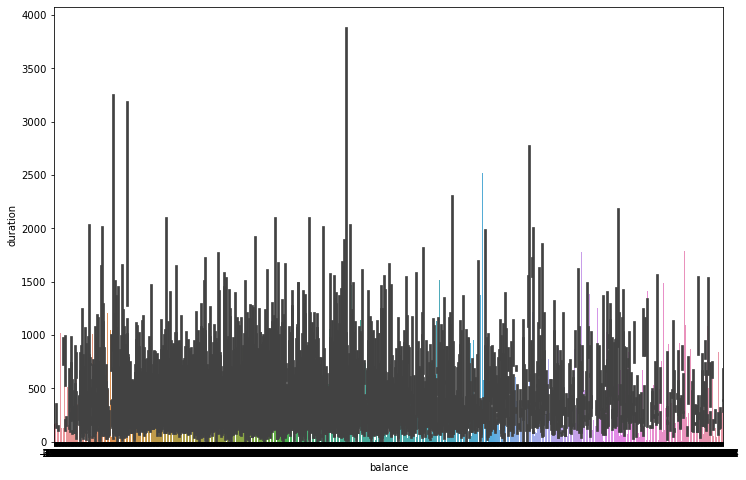

In [15]:
fig = plt.figure(figsize = (12, 8))
sns.barplot(x = 'balance', y = 'duration', data = bank_frame)

## Let's remove the dependent columns which we want to predict..!!

In [16]:
x_feature = list(bank_frame.columns)
x_feature.remove('balance')
x_feature

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

## Now, let's convert categorical variables into one hot encodings..!!

In [28]:
encoded_bank = pd.get_dummies(bank_frame[x_feature], drop_first = True)

In [31]:
encoded_bank.columns

Index(['age', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

## Now, convert dependent variable to 0 or 1..!!

In [32]:
x = encoded_bank.drop('loan_yes', axis = 1)
y = encoded_bank['loan_yes']

## Split data into train test split..!!

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 35)

In [34]:
x_train.shape

(8929, 41)

In [35]:
x_test.shape

(2233, 41)

In [36]:
x.shape

(11162, 41)

In [37]:
y.shape

(11162,)

## Now, apply Machine Learning (ML) Model..!!

## Apply Logistic Regression Model..!!

In [38]:
logistic_model = LogisticRegression()

## Training the model..!!

In [39]:
logistic_model.fit(x_train, y_train)

G:\MyPython3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Apply predictions on model..!!

In [40]:
y_pred = logistic_model.predict(x_test)

## Save training data and predicted data into dataframe..!!

In [45]:
bank_new_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
bank_new_frame

,Actual,Predicted
7315,1,0
9615,0,0
1462,0,0
2183,0,0
10369,0,0
...,...,...
3192,0,0
2269,0,0
1838,0,0
22,0,0


## Make histogram of new dataframe actual and predicted data..!!

array([[<AxesSubplot:title={'center':'Actual'}>,
        <AxesSubplot:title={'center':'Predicted'}>]], dtype=object)

<Figure size 864x576 with 0 Axes>

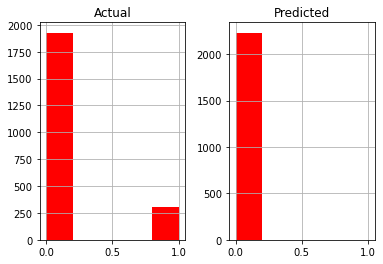

In [49]:
fig = plt.figure(figsize = (12, 8))
bank_new_frame.hist(bins = 5, color = 'red')

## Check the Model Accuracy..!!

In [61]:
accuracy = logistic_model.score(x_train, y_train)
print('Logistic Regression Model Accuracy:', accuracy * 100, '%')

Logistic Regression Model Accuracy: 87.04222197334528 %


# THE END..!!